![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


 # **Cortex Game: Round2--Conditional Amount**

Please note that you need to run this notebook 'Round2--Conditional Amount' first, before running the notebook 'Round2--Probability of Giving'.   

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

Grecia Pacheco Castellanos A01366730

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [1]:
my_folder = "/content/drive/MyDrive/SemestreTec/COLAB-SAS"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/SemestreTec/COLAB-SAS


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [2]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [3]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [4]:
pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 4.4 MB/s 
  Created wheel for saspy: filename=saspy-4.4.1-py3-none-any.whl size=9937304 sha256=f3033a3f66e1642922059ee28dd54c7b033fde24fff789b1c6181bad12cf4dbe
  Stored in directory: /root/.cache/pip/wheels/0a/f6/ab/f7173c8a824856c66f6fd50194bb8fd3ef93fb4f1824be8d0c
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [5]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
#'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [6]:
%%writefile .authinfo
oda user A01366730@tec.mx password Ohlnz1D*knesn

Overwriting .authinfo


Copy this file to home

In [7]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [8]:
import saspy
sas_session = saspy.SASsession(cfgfile=os.path.join(
    my_folder,"sascfg_personal.py"))
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 386



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/SemestreTec/COLAB-SAS/sascfg_personal.py
WORK Path             = /saswork/SAS_workABBE00017B59_odaws04-usw2.oda.sas.com/SAS_work782100017B59_odaws04-usw2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 97113


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [9]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Sunday, December  4, 2022 02:26:00 PM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Sunday, December  4, 2022 02:26:00 PM

33         


For local Jupyter

In [10]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

### Transform cloud SAS dataset to Python dataframe (pandas)

> For reference: 

> 1- [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2- [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [11]:
import pandas as pd

#comment: Transform cloud sas dataset to python dataframe(pandas) ==> might take some time.

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd2',
libref='cortex'
)

## Merge the Data

In [12]:
#Step1 Merge the Data
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge = data_merge.loc[(data_merge['GaveThisYear'] ==1)]
data_merge.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
493246,2493247.0,DAVIS,SCOTT,0.0,27.0,10000.0,Elementary,Suburban,9.0,3.0,...,1.0,3.0,20.0,20.0,20.0,0.0,0.0,1.0,1.0,100.0
686579,2686580.0,MATOS,EARL,0.0,39.0,20300.0,University / College,Downtown,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,30.0


## Understanding data
This part is neccesary to understand the problem and the variables provided in order to realice the correct data transformation for a better model training.



In [13]:
to_delete = ["ID", "LastName", "FirstName"]
data_merge = data_merge.drop(columns=to_delete)
data_merge.head()

,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
3,1.0,78.0,23700.0,High School,Rural,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,20.0
7,0.0,30.0,92700.0,University / College,Suburban,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,30.0
11,1.0,52.0,77600.0,High School,City,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,20.0
16,1.0,50.0,13000.0,High School,Suburban,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,1.0,1.0,75.0
20,1.0,39.0,237800.0,University / College,Rural,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,20.0


In [14]:
data_merge.describe()

,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
count,149457.000000,149457.000000,149457.000000,149457.000000,149457.000000,149457.000000,68433.000000,68433.000000,68433.000000,68433.000000,68433.000000,68433.000000,149457.000000,149457.000000,149457.000000,149457.0,149457.000000
mean,0.544979,45.256642,63898.012137,4.415210,0.917361,0.911459,2.750910,1.985796,4.674952,134.864685,42.502521,106.674485,0.208207,14.167085,0.261286,1.0,62.959012
std,0.497974,18.915539,60194.539355,3.345957,1.334288,1.412152,1.956686,1.297829,2.613877,372.981373,160.658491,344.831631,0.406027,121.163666,0.439337,0.0,227.894674
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,1.0,10.000000
25%,0.000000,29.000000,20300.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,25.000000,10.000000,20.000000,0.000000,0.000000,0.000000,1.0,20.000000
50%,1.000000,44.000000,43000.000000,4.000000,0.000000,0.000000,2.000000,2.000000,4.000000,50.000000,20.000000,30.000000,0.000000,0.000000,0.000000,1.0,25.000000
75%,1.000000,59.000000,87000.000000,7.000000,1.000000,1.000000,4.000000,3.000000,7.000000,115.000000,30.000000,75.000000,0.000000,0.000000,1.000000,1.0,50.000000
max,1.000000,90.000000,250000.000000,10.000000,10.000000,15.000000,10.000000,10.000000,10.000000,12160.000000,10000.000000,10000.000000,1.000000,10000.000000,1.000000,1.0,10000.000000


In [15]:
NUMERICS = ('int16', 'int32', 'int64', 'float16', 'float32', 'float64')

data_merge.select_dtypes(include = NUMERICS).describe().T


,count,mean,std,min,25%,50%,75%,max
Woman,149457.0,0.544979,0.497974,0.0,0.0,1.0,1.0,1.0
Age,149457.0,45.256642,18.915539,16.0,29.0,44.0,59.0,90.0
Salary,149457.0,63898.012137,60194.539355,0.0,20300.0,43000.0,87000.0,250000.0
SeniorList,149457.0,4.415210,3.345957,0.0,1.0,4.0,7.0,10.0
NbActivities,149457.0,0.917361,1.334288,0.0,0.0,0.0,1.0,10.0
Referrals,149457.0,0.911459,1.412152,0.0,0.0,0.0,1.0,15.0
Recency,68433.0,2.750910,1.956686,1.0,1.0,2.0,4.0,10.0
Frequency,68433.0,1.985796,1.297829,1.0,1.0,2.0,3.0,10.0
Seniority,68433.0,4.674952,2.613877,1.0,2.0,4.0,7.0,10.0
TotalGift,68433.0,134.864685,372.981373,10.0,25.0,50.0,115.0,12160.0


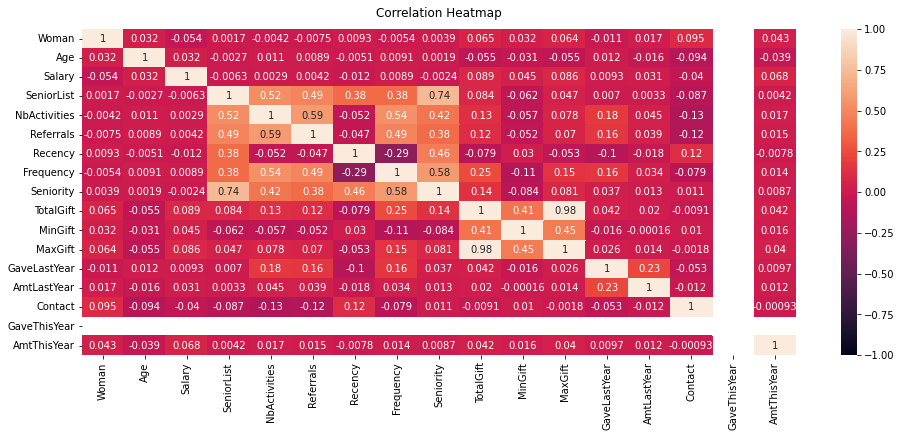

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data_merge.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

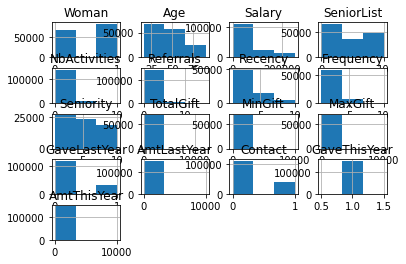

In [18]:
hists = data_merge.hist(bins=3)

## Treating Missing Values

>Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.

In [19]:
#Libraries
import math

In [20]:
# In this case, we are replacing MinGift by 0.

data_merge[['MinGift']] = data_merge[['MinGift']].fillna(value=0)  
data_merge[['MaxGift']] = data_merge[['MaxGift']].fillna(value=data_merge['MaxGift'].median())



In [21]:
# For non specific numerical data we are filling with  the mean

data_merge[['Recency']] = data_merge[['Recency']].fillna(math.floor(data_merge['Recency'].mean()))  
data_merge[['Frequency']] = data_merge[['Frequency']].fillna(math.floor(data_merge['Frequency'].mean()))  
data_merge[['Seniority']] = data_merge[['Seniority']].fillna(math.floor(data_merge['Seniority'].mean()))  
data_merge[['Referrals']] = data_merge[['Referrals']].fillna(math.floor(data_merge['Referrals'].mean()))

In [22]:
# For categorical data we are filling with the mode 

data_merge[['City']] = data_merge[['City']].fillna(value="City")  
data_merge= pd.get_dummies(data_merge, columns= ['City'])

In [23]:
data_merge[['Education']] = data_merge[['Education']].fillna(value="University / College")  
data_merge= pd.get_dummies(data_merge, columns= ['Education'])

## Normalization

In [24]:
from sklearn import preprocessing

x_scale = preprocessing.scale(data_merge)

In [25]:
df = pd.DataFrame(x_scale, columns = data_merge.columns)

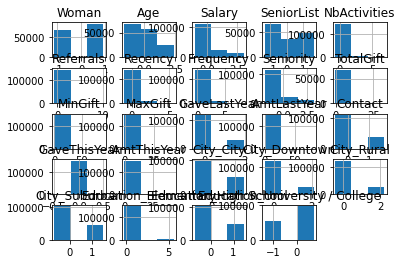

In [26]:
hists = df.hist(bins=3)

## Duplicates and outliers

In [27]:
# Removing duplicates
data_merge= data_merge.drop_duplicates()
data_merge.shape

(149432, 24)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


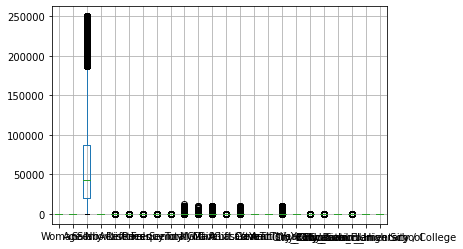

In [28]:
data_merge.boxplot()


In [29]:
# Function to identify and remove outliers
def outliers(col):
  global data_merge
  percentile25 = data_merge[col].quantile(0.25)
  percentile75 = data_merge[col].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  data_merge[data_merge[col] > upper_limit]
  data_merge[data_merge[col] < lower_limit]
  data_merge = data_merge[data_merge[col] < upper_limit]
  

In [30]:
col_names= ['Salary']
for i in col_names:
  outliers(i)
data_merge.shape

(139231, 24)

## Feature selection

In [37]:
# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
# load data

to_delete = ["AmtThisYear","TotalGift"]
array = df.values
X = df.drop(columns=to_delete)
y =  data_merge['AmtThisYear']
# feature extraction
pca = PCA(n_components=5)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.15313856 0.09756621 0.07153652 0.06882178 0.06681694]
[[-5.49758829e-03  6.24145242e-03  1.30806016e-02  4.14080444e-01
   4.45022221e-01  4.26571099e-01  1.63029054e-01  4.42341902e-01
   4.12683545e-01  6.06810286e-02  1.50767834e-01  1.19082597e-01
   4.28008694e-02 -9.73156888e-02  0.00000000e+00  1.42615644e-02
   2.38991192e-02 -4.65804398e-02  3.01713870e-03 -9.50190368e-03
  -1.83852502e-02  2.14273851e-02]
 [-4.26908365e-02 -1.10417925e-01  2.73080107e-01 -3.16003229e-02
  -1.11928397e-02 -9.22734769e-03 -3.60334550e-02 -7.19605203e-03
  -3.53502477e-02  3.84489900e-02  4.52850668e-02  1.71092747e-02
   2.44572461e-02 -1.85796917e-02  0.00000000e+00 -6.00636484e-02
   4.22422137e-02 -1.41691180e-02  3.75479503e-02 -1.11160962e-01
  -6.51524594e-01  6.77491643e-01]
 [-3.63563426e-02  3.98571043e-02  5.56226857e-02 -1.17147232e-01
   3.71965145e-02  3.64851688e-02 -2.37128922e-01  6.20909740e-02
  -1.46513568e-01  1.07273008e-01  1.39717596e-01  1.69050005

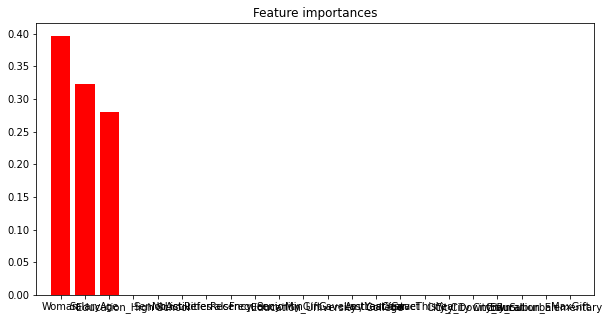

In [38]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np


to_delete = ["AmtThisYear","TotalGift"]
X= data_merge.drop(columns=to_delete)
y =  data_merge['AmtThisYear']

sel = SelectFromModel(DecisionTreeRegressor(max_depth=3))
sel.fit(X, y)

importances = sel.estimator_.feature_importances_
names = sel.estimator_.feature_names_in_

indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), [names[i] for i in indices])
plt.xlim([-1, X.shape[1]])
plt.show()



In [39]:
print(names)

['Woman' 'Age' 'Salary' 'SeniorList' 'NbActivities' 'Referrals' 'Recency'
 'Frequency' 'Seniority' 'MinGift' 'MaxGift' 'GaveLastYear' 'AmtLastYear'
 'Contact' 'GaveThisYear' 'City_City' 'City_Downtown' 'City_Rural'
 'City_Suburban' 'Education_Elementary' 'Education_High School'
 'Education_University / College']


## Data Partition

In [40]:
# The code below is an illustration on how to sample data on train and validation samples.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge, test_size=0.2,random_state=1) # you can change the percentage
#train.sample(5)


## Prebuilt Models

***


In [41]:
X_train = train[['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities','Referrals']] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities','Referrals']] 
Y_valid = validation['AmtThisYear']

## Model training and optimization

### Linear model

In [42]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(X_train,Y_train)

regr_predict=regr.predict(X_valid)

print(regr_predict)

[56.34986201 50.88217277 56.36931033 ... 65.35128635 72.55695747
 65.25860137]


In [43]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

59.9966483808903
45544.27512167518
213.41104732809683


### Regression Tree Model（Py）

In [44]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor(max_depth=6, random_state=0).fit(X_train,Y_train)
DT_predict = DT_model.predict(X_valid) #Predictions on Testing data
print(DT_predict)

[ 51.55765595  43.07356898  63.14814815 ...  65.29528339 102.27434257
  65.29528339]


In [45]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

60.125775610347276
49481.078066154936
222.44342666429804


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


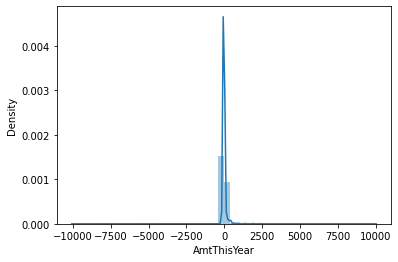

In [46]:
import seaborn as sns
sns.distplot(Y_valid-DT_predict)

#### Optimization

In [47]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7],
           "min_samples_leaf":[1,2,3,4],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6],
           "max_features":["log2","sqrt"],
           "max_leaf_nodes":[10,20,30,40,50,60] }

In [48]:
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(DT_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [49]:
#tuning_model.fit(X_train, Y_train)
#tuning_model.best_params_

In [50]:
DT_model2 = DecisionTreeRegressor(max_depth=5, max_features= 'log2',max_leaf_nodes= 10,min_samples_leaf= 1,min_weight_fraction_leaf= 0.1,splitter='best').fit(X_train,Y_train)
DT_predict2 = DT_model2.predict(X_valid) #Predictions on Testing data
print(DT_predict2)

[ 55.52190048  56.44304292  58.88734474 ...  56.44304292 128.70199752
  56.44304292]


In [51]:
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict2))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict2))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict2)))

59.52017719752897
45355.78402794005
212.9689743318027


### XGBoost

In [52]:
from xgboost.sklearn import XGBRegressor

XGB_model = XGBRegressor(booster = "gbtree", learning_rate= 0.07 ,max_depth = 7, subsample= 0.6)

XGB_model.fit(X_train,Y_train)
XGB_model.score(X_train,Y_train)
XGB_predict=XGB_model.predict(X_valid)

[14:34:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [53]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,XGB_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,XGB_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,XGB_predict)))

60.337660487418965
46439.11512133473
215.49736685475935


#### Optimization

In [55]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 4.1 MB/s 
     |████████████████████████████████| 81 kB 8.0 MB/s 
     |████████████████████████████████| 209 kB 45.9 MB/s 
     |████████████████████████████████| 78 kB 6.7 MB/s 
     |████████████████████████████████| 147 kB 46.8 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
     |████████████████████████████████| 112 kB 45.9 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=269a460923ab003b938f47b9353ac25d09cd693108dc0680e8ad91ae72768cfc
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


In [56]:
import xgboost as xgb
import numpy as np
import optuna
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from optuna.samplers import TPESampler
from xgboost import XGBRegressor
from optuna.integration import XGBoostPruningCallback
from sklearn.model_selection import RepeatedKFold
from optuna import create_study

def objective(
    trial,
    X,
    y,
    random_state=22,
    n_splits=3,
    n_repeats=2,
    n_jobs=1,
    early_stopping_rounds=100,
):
    # XGBoost parameters
    params = {
        "verbosity": 0,  # 0 (silent) - 3 (debug)
        "objective": "reg:squarederror",
        "n_estimators": 100,
        "max_depth": trial.suggest_int("max_depth", 4, 12),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.00001, 0.01),
        "colsample_bytree": trial.suggest_loguniform("colsample_bytree", 0.2, 0.6),
        "subsample": trial.suggest_loguniform("subsample", 0.4, 0.8),
        "alpha": trial.suggest_loguniform("alpha", 0.01, 10.0),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 10.0),
        "gamma": trial.suggest_loguniform("gamma", 1e-8, 10.0),
        "min_child_weight": trial.suggest_loguniform("min_child_weight", 10, 1000),
        "seed": random_state,
        "n_jobs": n_jobs,
    }

    model = XGBRegressor(**params)
    pruning_callback = XGBoostPruningCallback(trial, "validation_0-rmse")
    rkf = RepeatedKFold(
        n_splits=n_splits, n_repeats=n_repeats, random_state=random_state
    )
    X_values = X.values
    y_values = y.values
    y_pred = np.zeros_like(y_values)
    for train_index, test_index in rkf.split(X_values):
        X_A, X_B = X_values[train_index, :], X_values[test_index, :]
        y_A, y_B = y_values[train_index], y_values[test_index]
        model.fit(
            X_A,
            y_A,
            eval_set=[(X_B, y_B)],
            eval_metric="rmse",
            verbose=0,
            callbacks=[pruning_callback],
            early_stopping_rounds=early_stopping_rounds,
        )
        y_pred[test_index] += model.predict(X_B)
    y_pred /= n_repeats
    return np.sqrt(mean_squared_error(Y_train, y_pred))

In [57]:
sampler = TPESampler(seed=124, multivariate=True)
study = create_study(direction="minimize", sampler=sampler)
study.optimize(
    lambda trial: objective(
        trial,
        X_train,
        Y_train,
        random_state=124,
        n_splits=10,
        n_repeats=1,
        n_jobs=12,
        early_stopping_rounds=100,
    ),
    n_trials=2,
    n_jobs=1,
)

# display params
hp = study.best_params
for key, value in hp.items():
    print(f"{key:>20s} : {value}")
print(f"{'best objective value':>20s} : {study.best_value}")

/usr/local/lib/python3.8/dist-packages/optuna/samplers/_tpe/sampler.py:281: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2022-12-04 14:38:51,843] A new study created in memory with name: no-name-0b4ccdef-3f3e-4347-a7f9-1d5e590f6ca2
<ipython-input-56-14e632185ca4>:28: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.00001, 0.01),
<ipython-input-56-14e632185ca4>:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  "colsample_bytree": trial.suggest_loguniform("colsample_bytree", 0.2, 0.6),
<ipython-input-56

           max_depth : 6
       learning_rate : 0.002186548505763493
    colsample_bytree : 0.38625183421563675
           subsample : 0.4355826100654535
               alpha : 0.1474762542832591
              lambda : 5.955184543677973
               gamma : 0.00016158093114227923
    min_child_weight : 19.06965408897461
best objective value : 218.82845014943942


In [58]:
hp["verbosity"] = 0
hp["objective"] = "reg:squarederror"
hp["n_estimators"] = 100
hp["seed"] = 124
hp["n_jobs"] = 12
model = XGBRegressor(**hp)
rkf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=124)
X_values = X_train.values
y_values = Y_train.values
y_pred = np.zeros_like(Y_valid.values)
for train_index, test_index in rkf.split(X_values):
    X_A, X_B = X_values[train_index, :], X_values[test_index, :]
    y_A, y_B = y_values[train_index], y_values[test_index]
    model.fit(
        X_A,
        y_A,
        eval_set=[(X_B, y_B)],
        eval_metric="rmse",
        early_stopping_rounds=100,
        verbose=0,
    )
    y_pred += model.predict(X_valid.values)
y_pred /= 1 * 10

In [59]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,y_pred))
#MSE
print(metrics.mean_squared_error(Y_valid,y_pred))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,y_pred)))

48.766400597283585
48171.8746523594
219.4809209301788


## Scoring New Data

### Prepare data for scoring

In [60]:
data3 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
table='score_rd2_nocontact',
libref='cortex'
)

 ### Score new data based on your champion model
 
 Pick your champion model from previous steps and use it to predict next year donations. 
 
 In this case, the linear regression model performed better than the regression tree based on the MSE criteria.

### Predict 'amount given' for members who were contacted

In [61]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_contact[['MinGift']] = scoring_data_contact[['MinGift']].fillna(value=0) 
scoring_data_contact[['MaxGift']] = scoring_data_contact[['MaxGift']].fillna(value=0)  
scoring_data_contact[['TotalGift']] = scoring_data_contact[['TotalGift']].fillna(value=scoring_data_contact['MinGift']+ scoring_data_contact['MaxGift'])

scoring_data_contact[['Recency']] = scoring_data_contact[['Recency']].fillna(math.floor(scoring_data_contact['Recency'].mean()))  
scoring_data_contact[['Frequency']] = scoring_data_contact[['Frequency']].fillna(math.floor(scoring_data_contact['Frequency'].mean()))  
scoring_data_contact[['Seniority']] = scoring_data_contact[['Seniority']].fillna(math.floor(scoring_data_contact['Seniority'].mean()))  
scoring_data_contact[['Referrals']] = scoring_data_contact[['Referrals']].fillna(math.floor(scoring_data_contact['Referrals'].mean()))

scoring_data_contact[['City']] = scoring_data_contact[['City']].fillna(value="City")  
scoring_data_contact= pd.get_dummies(scoring_data_contact, columns= ['City'])

scoring_data_contact[['Education']] = scoring_data_contact[['Education']].fillna(value="University / College")  
scoring_data_contact= pd.get_dummies(scoring_data_contact, columns= ['Education'])

scoring_data_contact= scoring_data_contact.drop_duplicates()


X = scoring_data_contact[['Age', 'Salary','Contact','MinGift', 'AmtLastYear','GaveLastYear','Woman', 'NbActivities','Referrals']]  

regr_predict_contact=DT_model2.predict(X.values)

scoring_data_contact['Prediction'] = regr_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction']]
scoring_data_contact = scoring_data_contact.rename({'Prediction': 'AmtContact'}, axis=1) 
scoring_data_contact.head()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


,ID,AmtContact
0,2000001.0,58.887345
1,2000002.0,56.443043
2,2000003.0,128.701998
3,2000004.0,56.443043
4,2000005.0,128.701998


### Predict 'amount given' for members who were not contacted

In [62]:
scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_nocontact[['MinGift']] = scoring_data_nocontact[['MinGift']].fillna(value=0)
scoring_data_nocontact[['MinGift']] = scoring_data_nocontact[['MinGift']].fillna(value=0) 
scoring_data_nocontact[['MaxGift']] = scoring_data_nocontact[['MaxGift']].fillna(value=0)  
scoring_data_nocontact[['TotalGift']] = scoring_data_nocontact[['TotalGift']].fillna(value=scoring_data_nocontact['MinGift']+ scoring_data_nocontact['MaxGift'])

scoring_data_nocontact[['Recency']] = scoring_data_nocontact[['Recency']].fillna(math.floor(scoring_data_nocontact['Recency'].mean()))  
scoring_data_nocontact[['Frequency']] = scoring_data_nocontact[['Frequency']].fillna(math.floor(scoring_data_nocontact['Frequency'].mean()))  
scoring_data_nocontact[['Seniority']] = scoring_data_nocontact[['Seniority']].fillna(math.floor(scoring_data_nocontact['Seniority'].mean()))  
scoring_data_nocontact[['Referrals']] = scoring_data_nocontact[['Referrals']].fillna(math.floor(scoring_data_nocontact['Referrals'].mean()))

scoring_data_nocontact[['City']] = scoring_data_nocontact[['City']].fillna(value="City")  
scoring_data_nocontact= pd.get_dummies(scoring_data_nocontact, columns= ['City'])

scoring_data_nocontact[['Education']] = scoring_data_nocontact[['Education']].fillna(value="University / College")  
scoring_data_nocontact= pd.get_dummies(scoring_data_nocontact, columns= ['Education'])

scoring_data_nocontact= scoring_data_nocontact.drop_duplicates()

X = scoring_data_nocontact[['Age', 'Salary','Contact','MinGift','AmtLastYear', 'GaveLastYear','Woman', 'NbActivities','Referrals']]  

regr_predict_nocontact=DT_model2.predict(X.values)

scoring_data_nocontact['Prediction'] = regr_predict_nocontact

scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction': 'AmtNoContact'}, axis=1) 
scoring_data_nocontact.head()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


,ID,AmtNoContact
0,2000001.0,58.887345
1,2000002.0,56.443043
2,2000003.0,128.701998
3,2000004.0,56.443043
4,2000005.0,128.701998


In [63]:
result_Amt = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"],how="right")
result_Amt.sort_values(by=['AmtContact'], inplace=True)
result_Amt.head(3)

,ID,AmtContact,AmtNoContact
162935,2162936.0,38.847504,38.847504
839383,2839384.0,38.847504,38.847504
648117,2648118.0,38.847504,38.847504


## Exporting Results to a CSV File

In [64]:
result_Amt.to_csv('Round2_Output_amt.csv', index=False)

In [65]:
NB = 10000
submission = result_Amt.head(NB)
submission.to_csv('Round2_Output_amt.csv', index=False)

In [66]:
!head Round2_Output_amt.csv

ID,AmtContact,AmtNoContact
2162936.0,38.847503810095596,38.847503810095596
2839384.0,38.847503810095596,38.847503810095596
2648118.0,38.847503810095596,38.847503810095596
2120484.0,38.847503810095596,38.847503810095596
2839378.0,38.847503810095596,38.847503810095596
2120486.0,38.847503810095596,38.847503810095596
2390853.0,38.847503810095596,38.847503810095596
2264221.0,38.847503810095596,38.847503810095596
2839369.0,38.847503810095596,38.847503810095596
